In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
df = pd.read_csv(r"D:\Data Science\Deep Learning\ANN\Customer Churn Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2133,8051-HJRLT,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.55,70.55,Yes
6716,9850-OWRHQ,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.10,228,Yes
1096,4646-QZXTF,Female,0,Yes,No,7,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),81.25,580.1,No
253,3282-ZISZV,Male,0,No,Yes,32,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),83.70,2633.3,No
468,8896-RAZCR,Female,0,No,Yes,44,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.90,868.1,No


In [5]:
df.drop('customerID', axis='columns', inplace=True)

In [6]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
# pd.to_numeric(df["TotalCharges"])
# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# File lib.pyx:2368, in pandas._libs.lib.maybe_convert_numeric()

# ValueError: Unable to parse string " "

# During handling of the above exception, another exception occurred:

# ValueError                                Traceback (most recent call last)
# Cell In[111], line 1
# ----> 1 pd.to_numeric(df["TotalCharges"])

# File c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\tools\numeric.py:222, in to_numeric(arg, errors, downcast, dtype_backend)
#     220 coerce_numeric = errors not in ("ignore", "raise")
#     221 try:
# --> 222     values, new_mask = lib.maybe_convert_numeric(  # type: ignore[call-overload]  # noqa: E501
#     223         values,
#     224         set(),
#     225         coerce_numeric=coerce_numeric,
#     226         convert_to_masked_nullable=dtype_backend is not lib.no_default
#     227         or isinstance(values_dtype, StringDtype),
#     228     )
#     229 except (ValueError, TypeError):
#     230     if errors == "raise":

# File lib.pyx:2410, in pandas._libs.lib.maybe_convert_numeric()

# ValueError: Unable to parse string " " at position 488

In [10]:
pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df.shape

(7043, 20)

In [12]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df1 = df[df['TotalCharges'] !=' ']
df1.shape

(7032, 20)

In [14]:
df1['TotalCharges'] = pd.to_numeric(df1["TotalCharges"])

C:\Users\Acer\AppData\Local\Temp\ipykernel_12616\3184933731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1["TotalCharges"])


In [15]:
df1['TotalCharges'].dtypes

dtype('float64')

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

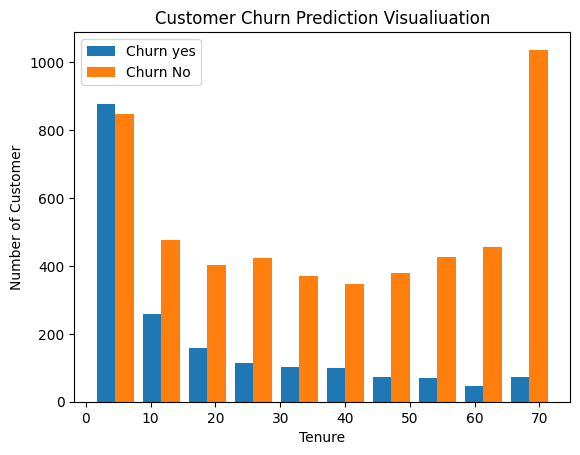

In [17]:
tenure_churn_n0 = df1[df1['Churn']=='No'].tenure
tenure_churn_yes = df1[df1['Churn']=='Yes'].tenure
plt.xlabel("Tenure")
plt.ylabel("Number of Customer")
plt.title("Customer Churn Prediction Visualiuation")
plt.hist([tenure_churn_yes, tenure_churn_n0],label=("Churn yes","Churn No"))
plt.legend()

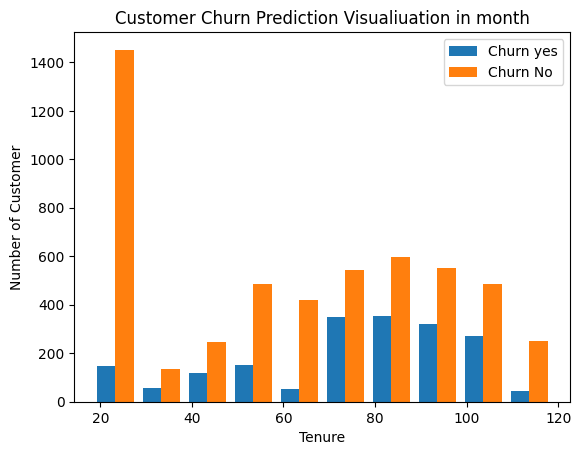

In [18]:
mc_churn_n0 = df1[df1['Churn']=='No'].MonthlyCharges
mc_churn_yes = df1[df1['Churn']=='Yes'].MonthlyCharges
plt.xlabel("Tenure")
plt.ylabel("Number of Customer")
plt.title("Customer Churn Prediction Visualiuation in month")
plt.hist([mc_churn_yes, mc_churn_n0],label=("Churn yes","Churn No"))
plt.legend()


In [19]:
for column in df:
    print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [20]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f"{column} : {df[column].unique()}")

In [21]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [22]:
df1.replace('No internet service', "No", inplace=True)
df1.replace('No phone service', "No", inplace=True)


C:\Users\Acer\AppData\Local\Temp\ipykernel_12616\2329976874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', "No", inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_12616\2329976874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', "No", inplace=True)


In [23]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [24]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
                  'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0},inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_12616\4094578956.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1, 'No':0},inplace=True)


In [25]:
for col in df1:
    print(f"{col} : {df1[col].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [26]:
df1['gender'].replace({'Female':1, 'Male':0},inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_12616\940752256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0},inplace=True)


In [27]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [28]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])



In [29]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1874,1,0,1,0,43,1,1,1,1,0,...,True,False,False,False,False,True,False,True,False,False
3458,1,0,0,0,26,1,0,0,0,0,...,False,True,False,True,False,False,True,False,False,False
563,0,0,1,1,59,1,1,0,0,1,...,False,True,False,False,False,True,False,True,False,False
3400,0,0,0,0,18,1,1,0,0,0,...,False,True,False,True,False,False,True,False,False,False


In [30]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [31]:
bool_columns = df2.select_dtypes(include=["bool"]).columns
bool_columns

Index(['InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [32]:
df2[bool_columns]=df2[bool_columns].astype(int)

In [33]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [34]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1169,0,1,0,0,70,0,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
950,0,1,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2651,0,0,0,0,24,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2082,0,0,0,1,21,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1718,1,0,0,0,17,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [35]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [36]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [37]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6893,1,0,1,1,0.070423,1,0,1,1,0,0,0,0,0,0.374627,0.039990,1,1,0,0,1,0,0,0,1,0,0
5903,0,0,1,0,0.718310,1,1,1,0,1,1,0,0,1,0.729851,0.531849,0,0,1,0,0,0,1,0,1,0,0
752,0,0,1,1,0.084507,1,0,1,0,1,1,0,1,1,0.528358,0.057345,0,1,0,0,1,0,0,0,1,0,0
4770,1,0,1,1,0.070423,1,0,0,0,0,0,0,0,0,0.014428,0.008730,0,0,0,1,0,1,0,0,0,0,1
3775,0,1,0,0,0.563380,1,1,0,0,1,0,1,1,1,0.797512,0.481070,1,0,1,0,1,0,0,0,0,1,0


In [38]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [40]:
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5625, 26)
Shape of y_train =  (5625,)
Shape of X_test =  (1407, 26)
Shape of y_test =  (1407,)


# Creating Neural Network 

In [41]:
import tensorflow as tf 
from tensorflow import keras 

In [42]:
len(X_train.columns)

26

In [55]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation = 'sigmoid'),
    
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


model.fit(X_train, y_train, epochs = 100, batch_size=8)

Epoch 1/100
704/704 [==============================] - 2s 1ms/step - loss: 0.5825 - accuracy: 0.7058
Epoch 2/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4880 - accuracy: 0.7584
Epoch 3/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4602 - accuracy: 0.7787
Epoch 4/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4580 - accuracy: 0.7730
Epoch 5/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4518 - accuracy: 0.7765
Epoch 6/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4414 - accuracy: 0.7844
Epoch 7/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4385 - accuracy: 0.7826
Epoch 8/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4389 - accuracy: 0.7872
Epoch 9/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4427 - accuracy: 0.7820
Epoch 10/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4401 - accura

In [56]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7910


[0.4589873254299164, 0.7910447716712952]

In [45]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 788us/step


array([[0.34801143],
       [0.49063942],
       [0.01922265],
       [0.81738424],
       [0.5179461 ]], dtype=float32)

In [46]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [47]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [48]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.64      0.57      0.61       408

    accuracy                           0.78      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.78      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

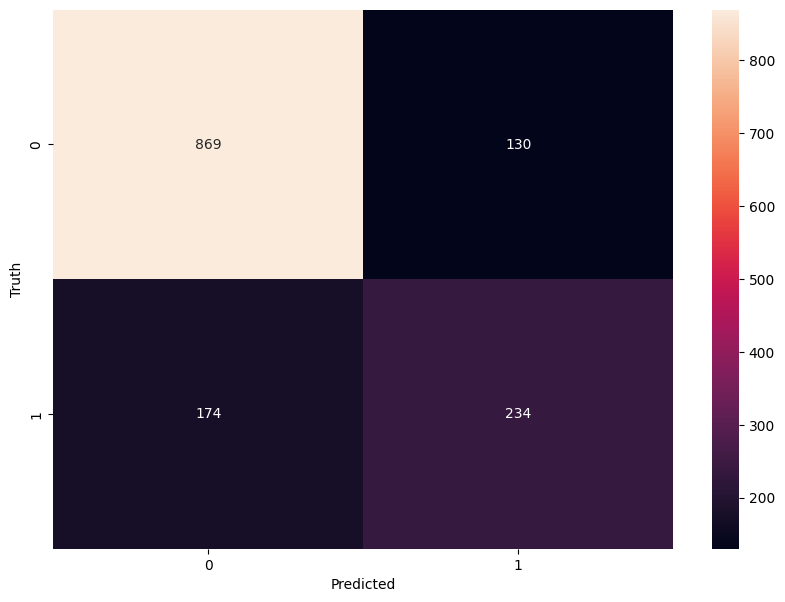

In [50]:
import seaborn as sns 
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel("Truth")

__We will further increase our accuracy__

In [59]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
    keras.layers.Dense(26, input_dim=26, activation = 'relu'),
    
    keras.layers.Dense(15, activation = 'relu'),
   
    
    
    keras.layers.Dense(1, activation = 'sigmoid'),
                ])

    model.compile(optimizer = 'adam',
                loss = loss,
                metrics = ['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("classification_report : \n", classification_report(y_test, y_preds))

    return y_preds
    


In [60]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4864 - accuracy: 0.7628
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.7934
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.7986
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.8023
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8068
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.8082
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8084
Epoch 8/100
176/176 [==============================] - 0s 994us/step - loss: 0.4059 - accuracy: 0.8092
Epoch 9/100
176/176 [==============================] - 0s 997us/step - loss: 0.4049 - accuracy: 0.8114
Epoch 10/100
176/176 [==============================] - 0s 987us/step - loss: 0.4032 - 

# Handling imbalanced datasets

In [61]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [62]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [63]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [64]:
# Number of classes in training Data
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [65]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5777 - accuracy: 0.7217
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.7702
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7722
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7746
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.7786
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.7813
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.7833
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7839
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7843
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7870
Epoch 11/

### Method2 : Oversampling

In [66]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [67]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [69]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [70]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5398 - accuracy: 0.7381
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4904 - accuracy: 0.7603
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7691
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7719
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7755
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.7792
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.7804
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4630 - accuracy: 0.7822
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4605 - accuracy: 0.7822
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4573 - accura

## method3 : SMOTE

In [71]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']


In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [75]:
# Number of classes in training Data
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state = 15, stratify=y_sm)

In [76]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5285 - accuracy: 0.7459
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7725
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.7749
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4599 - accuracy: 0.7777
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.7809
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4512 - accuracy: 0.7837
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.7885
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.7884
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.7933
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4392 - accura

# method 4 : USe of Ensemble with undersampling

In [77]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [78]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [80]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

model1 --> class1(1495) + class0(0, 1495)   

model2 --> class1(1495) + class0(1496, 2990)   

model3 --> class1(1495) + class0(2990, 4130)   

In [81]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [82]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [83]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train  

In [84]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6115 - accuracy: 0.6612
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7559
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.7649
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7692
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7645
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7692
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7726
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7769
Epoch 11/

In [85]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6060 - accuracy: 0.6773
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.7625
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7599
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7642
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7676
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7679
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7726
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7712
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7676
Epoch 11/

In [86]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 1ms/step - loss: 0.6112 - accuracy: 0.6774
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5357 - accuracy: 0.7480
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.7643
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4886 - accuracy: 0.7715
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7742
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.7799
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7772
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.7784
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7856
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4655 - accuracy: 0.7822
Epoch 11/

In [87]:
len(y_pred1)

1407

In [88]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [89]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407

